## Information on **WRONG : Zero colision predictor v2** :

This experiment is wrong and was redone correctly in the file analyse/04_26_redo_0_col_pred/analyse_04_26.ipynb. It is wrong because the way to handle nan values led to some collisions not being detected.

The goal of this experiement is to predict a colision-free trajectory, even if the original predition would have had a colision. To do so, we add noise of different magnitude on the observation and predict 100 trajectories. If one of these is colision-free, it is returned and the prediction is now colision-free.

The dataset "test_private" (also called "secret") was used to generate those data. It contains the real ground truth of the trajectory, in order to calculate the ade/fde. As these ground truth are the solutions of a contest, they are not present in this repo.

The plots are explained below.

### Code : 

To generate those data, the files *random_smooth/smooth_model.py* and *random_smooth/zero_col_certifier.py*. To run the code, a bash script named *run_no_col_cert.bat* can be launched (on windows). The flag PREDICTION_MODE must be set to "just_one" so that the model will predict "colision-free" if just one or more prediction are colision-free.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df0 = pd.read_csv("data/results_predict_all_0.0.txt", sep="\t")
df3 = pd.read_csv("data/results_predict_all_0.003.txt", sep="\t")
df6 = pd.read_csv("data/results_predict_all_0.006.txt", sep="\t")
df9 = pd.read_csv("data/results_predict_all_0.009.txt", sep="\t")
df12 = pd.read_csv("data/results_predict_all_0.012.txt", sep="\t")
df18 = pd.read_csv("data/results_predict_all_0.018.txt", sep="\t")


df = pd.concat((df0, df3, df6, df9, df12, df18), ignore_index=True)

In [5]:
len(df0)

3146

### no noise analysis

In [102]:
df0[["col", "ade", "fde"]].mean() #not 7% CR

col    0.006039
ade    0.301127
fde    1.141240
dtype: float64

In [103]:
df0[df0["col"] == -2] #solo agents

,scene_id,sigma,col,noise_norm,ade,fde
1001,379,0.0,-2,-2.0,-2.0,-2.0
1003,380,0.0,-2,-2.0,-2.0,-2.0
1005,381,0.0,-2,-2.0,-2.0,-2.0


### all analysis

In [104]:
df[df["col"]==-2].head(7)

,scene_id,sigma,col,noise_norm,ade,fde
1001,379,0.000,-2,-2.0,-2.0,-2.0
1003,380,0.000,-2,-2.0,-2.0,-2.0
1005,381,0.000,-2,-2.0,-2.0,-2.0
4147,379,0.003,-2,-2.0,-2.0,-2.0
4149,380,0.003,-2,-2.0,-2.0,-2.0
4151,381,0.003,-2,-2.0,-2.0,-2.0
7293,379,0.006,-2,-2.0,-2.0,-2.0


In [105]:
df = df[df["col"]!=-2] #clearing solo (only 3 scenes ??)

In [106]:
df[df["col"] != 0] #all colisions

,scene_id,sigma,col,noise_norm,ade,fde
482,160,0.000,1,0.000000,0.302069,1.236622
488,162,0.000,1,0.000000,0.559761,2.412341
1015,386,0.000,1,0.000000,0.202754,0.393887
1022,389,0.000,1,0.000000,0.142802,0.303282
1260,508,0.000,1,0.000000,0.071335,0.258569
1804,780,0.000,1,0.000000,0.291207,1.239086
1858,807,0.000,1,0.000000,0.146196,0.462035
1900,828,0.000,1,0.000000,0.364561,1.597258
1960,858,0.000,1,0.000000,0.724655,2.649855
2012,884,0.000,1,0.000000,0.804218,3.075626


### plots

In [107]:
df_mean = df.groupby("sigma")[["col", "fde", "ade"]].mean()
df_mean

,col,fde,ade
sigma,,,
0.000,0.007954,1.144239,0.303324
0.003,0.001273,1.146234,0.304396
0.006,0.000636,1.148243,0.305603
0.009,0.000636,1.150400,0.307534
0.012,0.000318,1.161798,0.312345
0.018,0.000000,1.169748,0.317347


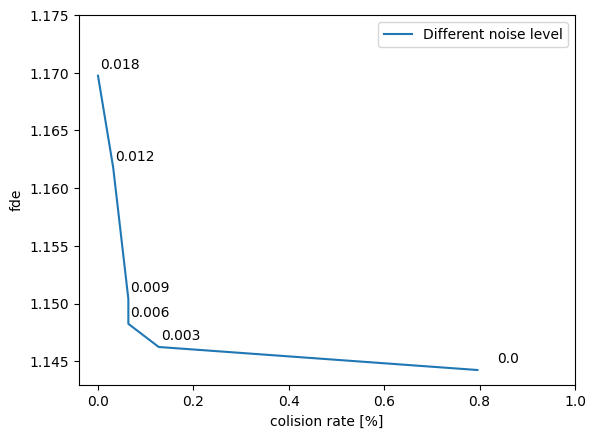

In [108]:
x = df_mean["col"]*100
y = df_mean["fde"]
plt.plot(x, y, label="Different noise level")
plt.ylabel("fde")
plt.xlabel("colision rate [%]")

plt.ylim(top = 1.175)
plt.xlim(right = 1)

#plt.axvline(0, color = "k")

plt.legend()



for i, (x,y) in enumerate(zip(x,y)):

    label = str(df_mean.index[i])

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,5), # distance from text to points (x,y)
                 ha='right')

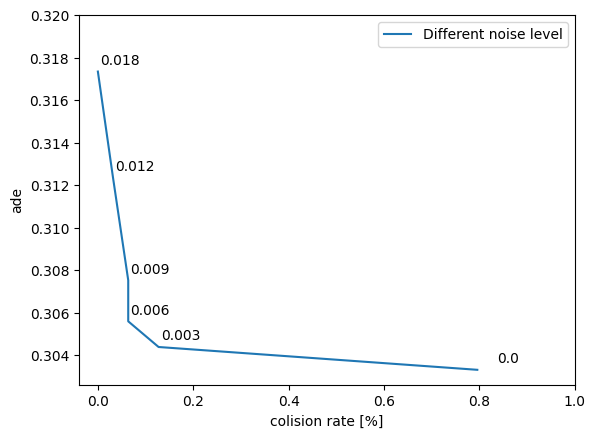

In [109]:
x1 = df_mean["col"]*100
y1 = df_mean["ade"]
plt.plot(x1, y1, label="Different noise level")
plt.ylabel("ade")
plt.xlabel("colision rate [%]")

plt.ylim(top = 0.32)
plt.xlim(right = 1.0)

#plt.axvline(0, color = "k")

plt.legend()

for i, (x1,y1) in enumerate(zip(x1,y1)):

    label = str(df_mean.index[i])

    plt.annotate(label, # this is the text
                 (x1,y1), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,5), # distance from text to points (x,y)
                 ha='right')

### real no noise 


In [110]:
df_no_noise = pd.read_csv("data/no_noise_2.txt", sep="\t")
df_no_noise.head(4)

,scene_id,col,ade,fde
0,0,0,0.636578,1.893563
1,0,0,0.259021,0.556868
2,0,0,0.226840,0.364002
3,1,0,0.825942,2.054745


In [111]:
df_no_noise.shape

(3146, 4)

In [119]:
df_no_noise[df_no_noise["col"] == 1]

,scene_id,col,ade,fde
1015,386,1,0.354820,0.393887
1900,828,1,0.638153,1.598277
2996,1616,1,0.751871,1.731110


In [112]:
print("num scene : ", df_no_noise.shape[0])
df_no_noise.mean() #CR=0.09%, ade=0.52 fde=1.13 // expreted 7.3% 0.57 1.23

num scene :  3146


scene_id    710.017165
col           0.000954
ade           0.528034
fde           1.137810
dtype: float64

### real no noise with drop distant

In [113]:
df_no_noise_with_drop = pd.read_csv("data/no_noise_with_drop.txt", sep="\t")
df_no_noise_with_drop.head(4)

,scene_id,col,ade,fde
0,0,0,0.6365777109442635,1.8935633967639212
1,0,0,0.25902059955712936,0.5568680902104044
2,0,0,0.22684015593203544,0.36400155169844833
3,1,0,0.8259416230159755,2.054744807074553


In [114]:
df_no_noise_with_drop[df_no_noise_with_drop["col"] == "None"]

,scene_id,col,ade,fde
1001,379,None,None,None
1003,380,None,None,None
1005,381,None,None,None


In [118]:
df_no_noise_with_drop[df_no_noise_with_drop["col"] == 1]

,scene_id,col,ade,fde
482,160,1,0.528622,1.236622
488,162,1,0.979583,2.412342
1015,386,1,0.354820,0.393887
1022,389,1,0.249903,0.303282
1260,508,1,0.124835,0.258569
1804,780,1,0.509612,1.239086
1858,807,1,0.255843,0.462035
1900,828,1,0.637983,1.597260
1960,858,1,1.268147,2.649854
2012,884,1,1.407382,3.075627


In [115]:
df_no_noise_with_drop = df_no_noise_with_drop[df_no_noise_with_drop["col"] != "None"]
df_no_noise_with_drop["col"] = df_no_noise_with_drop["col"].astype("int")
df_no_noise_with_drop["fde"] = df_no_noise_with_drop["fde"].astype("float")
df_no_noise_with_drop["ade"] = df_no_noise_with_drop["ade"].astype("float");


In [116]:
print("num scene with drop distant : ", df_no_noise_with_drop.shape[0])
df_no_noise_with_drop.mean() #CR=0.8%, ade=0.53 fde=1.14 // expreted 7.3% 0.57 1.23

num scene with drop distant :  3143


scene_id    710.332167
col           0.007954
ade           0.530795
fde           1.144202
dtype: float64